<a href="https://colab.research.google.com/github/daviniles/DIO/blob/main/Aula2_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando a biblioteca
import pandas as pd

In [ ]:
#leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [ ]:
#juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [ ]:
#exibindo as primeiras linhas
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8
5,Aracaju,2018-01-01,156.20,1522,1
6,Aracaju,2018-01-01,35.50,1522,2
7,Aracaju,2019-01-01,172.22,1522,6
8,Aracaju,2019-01-01,12.16,1523,1
9,Aracaju,2019-01-01,149.36,1523,3


In [ ]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [ ]:
#verificando os tipos de dados de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
#verificando o tipo de dados de cada coluna
df["LojaID"] = df["LojaID"].astype("object")

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
#criando a coluna receitas
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [ ]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [ ]:
#retornando o maior valor
df["Receita"].max()

3544.0

In [ ]:
#retornando o menor valor
df["Receita"].min()

3.34

In [ ]:
#nlargest
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [ ]:
#nsamllest
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [ ]:
#agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [ ]:
#ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Trabalhando com datas

In [ ]:
#tranformando a coluna de data em tipos inteiro
df["Data"] = df["Data"].astype("int64")

In [ ]:
#verificando o tipo de data em tipo inteiro
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#tranformando a coluna de data em data
df["Data"] = pd.to_datetime(df["Data"])

In [ ]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [ ]:
#agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [ ]:
#criando uma nova coluna com o ano
df["Ano_venda"]  = df["Data"].dt.year

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
188,Natal,2019-01-02,178.11,1035,3,534.33,2019
20,Recife,2019-01-01,42.35,982,3,127.05,2019
16,Fortaleza,2019-01-01,97.32,1002,5,486.60,2019
72,Salvador,2019-01-01,149.47,1036,3,448.41,2019
60,Natal,2018-05-02,534.00,852,3,1602.00,2018


In [ ]:
#extraindo o mes e o dia
df["mes_venda"], df["dia_venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
119,Fortaleza,2019-03-02,152.30,982,7,1066.10,2019,3,2
19,Fortaleza,2019-01-01,18.86,1002,3,56.58,2019,1,1
202,Salvador,2019-01-02,22.45,1036,1,22.45,2019,1,2
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18
145,Natal,2019-01-02,84.62,1034,2,169.24,2019,1,2


In [ ]:
#retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [ ]:
df["Data"].max()

Timestamp('2019-04-05 00:00:00')

In [ ]:
#calculando a diferencia de dia
df["diferencia_dias"] = df["Data"] - df["Data"].min()

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferencia_dias
66,Aracaju,2018-01-01,76.59,1523,4,306.36,2018,1,1,0 days
210,Salvador,2019-01-02,197.64,1035,1,197.64,2019,1,2,366 days
59,Salvador,2019-01-01,138.27,1034,2,276.54,2019,1,1,365 days
185,Salvador,2019-01-02,6.67,1036,1,6.67,2019,1,2,366 days
36,Fortaleza,2019-01-01,36.31,1004,2,72.62,2019,1,1,365 days


In [ ]:
#criando coluna de trimestre
df["semestre_venda"] = df["Data"].dt.quarter

In [ ]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferencia_dias,semestre_venda
77,Aracaju,2018-01-01,24.10,1522,1,24.10,2018,1,1,0 days,1
233,Salvador,2019-01-03,172.40,1036,2,344.80,2019,1,3,367 days,1
37,Aracaju,2018-01-01,152.74,1522,9,1374.66,2018,1,1,0 days,1
59,Aracaju,2018-01-01,15.07,1523,7,105.49,2018,1,1,0 days,1
205,Natal,2019-01-02,196.09,1037,1,196.09,2019,1,2,366 days,1


In [ ]:
df.rename(columns={"semestre_venda":"trimestre_venda"})

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferencia_dias,trimestre_venda
0,Aracaju,2018-01-01,142.00,1520,1,142.00,2018,1,1,0 days,1
1,Aracaju,2018-01-01,14.21,1522,6,85.26,2018,1,1,0 days,1
2,Aracaju,2018-01-01,71.55,1520,1,71.55,2018,1,1,0 days,1
3,Aracaju,2018-01-01,3.01,1521,7,21.07,2018,1,1,0 days,1
4,Aracaju,2018-01-01,24.51,1522,8,196.08,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84,2019,1,3,367 days,1
236,Salvador,2019-01-03,126.29,1035,3,378.87,2019,1,3,367 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,2019,1,3,367 days,1
238,Salvador,2019-01-03,139.64,1035,1,139.64,2019,1,3,367 days,1


In [ ]:
#filtrando as vendas de 2019 do mes de março
venda_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [ ]:
venda_marco_19.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferencia_dias,semestre_venda
71,Natal,2019-03-20,840.00,854,3,2520.00,2019,3,20,443 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1
122,Recife,2019-03-02,235.06,983,3,705.18,2019,3,2,425 days,1
132,Fortaleza,2019-03-02,17.49,983,5,87.45,2019,3,2,425 days,1
124,Recife,2019-03-02,47.98,983,7,335.86,2019,3,2,425 days,1


## Visualiando dados

In [148]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

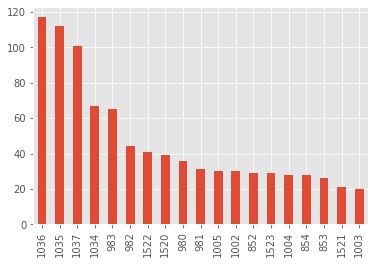

In [149]:
#grafico de barras
df["LojaID"].value_counts(ascending=False).plot.bar();

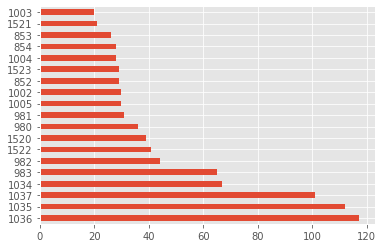

In [150]:
#grafico de barrar horizontais
df["LojaID"].value_counts().plot.barh();

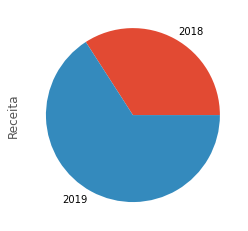

In [151]:
#grafico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [152]:
#total de vendas por cidade
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

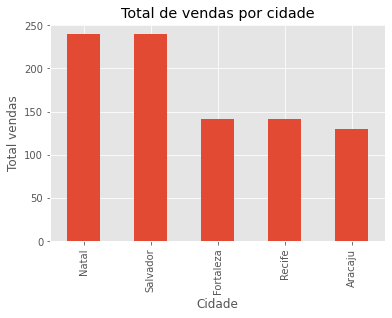

In [153]:
#Adicionando um titulo e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

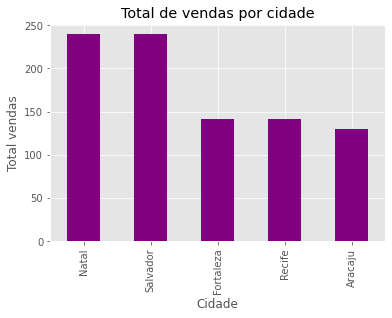

In [154]:
#alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="purple")
plt.xlabel("Cidade")
plt.ylabel("Total vendas");

In [155]:
#alterando o estilo
plt.style.use("ggplot")

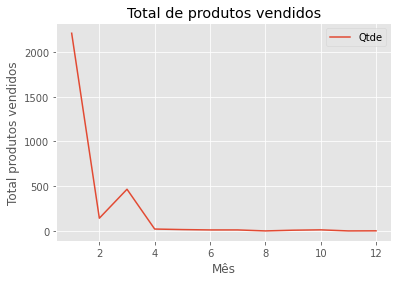

In [156]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total de produtos vendidos")
plt.xlabel("Mês")
plt.ylabel("Total produtos vendidos");
plt.legend();

In [157]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [158]:
#selecionar apenas vendas de 2019
df_2019 = df[df["Ano_venda"] == 2019]

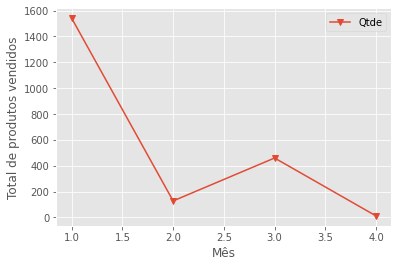

In [159]:
#total de produtos vendidos por mes
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos");
plt.legend();

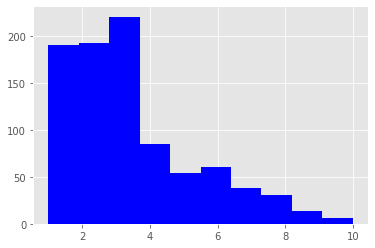

In [160]:
#hisograma
plt.hist(df["Qtde"], color="blue");

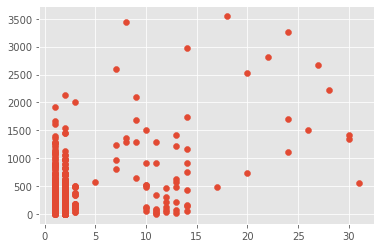

In [161]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

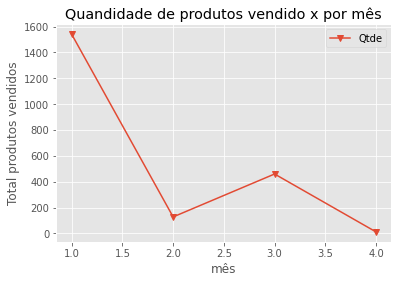

In [162]:
#salvando em png
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quandidade de produtos vendido x por mês")
plt.xlabel("mês")
plt.ylabel("Total produtos vendidos");
plt.legend()
plt.savefig("grafico Qtde x Mês.png")